Data Set Information:

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.


Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d



In [1]:
from IPython.display import Markdown, display

import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv('mushroom.csv', skipinitialspace = True, na_values = ['?'], names = ['result','cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 
                                                      'gill_color', 'stalk_shape', 'stalk_root','stalk_surface_above_ring','stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat'])
df.head(3)

,result,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


In [3]:
# I hve dropped the column stalk_root because there was a lot of missing data( 2560 out of 8124) in that column.
df= df.drop(['stalk_root'], axis = 1)

In [4]:
df.describe()

,result,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
df.shape

(8124, 22)

In [6]:
df.columns[df.isnull().any()].tolist()

[]

In [7]:
pd.set_option('display.max_columns', 500) #to not condense the collumns if there are too many of them.
# http://songhuiming.github.io/pages/2017/04/02/jupyter-and-pandas-display/

In [8]:
#df['stalk_root'].describe()

In [9]:
df[pd.isnull(df).any(axis=1)]  #to display the rows where we have a null value

,result,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat


In [10]:
df= df.dropna()
df.head(3)

,result,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,s,s,w,w,p,w,o,p,n,n,m


In [11]:
df.isnull().values.any()

False

In [12]:
df.shape

(8124, 22)

In [13]:
# result: edible=e, poisonous=p
d = {'e': 1, 'p': 2}
df['result'] = df['result'].map(d)

# cap_shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
d = {'b': 1, 'c': 2, 'x': 3, 'f': 4, 'k': 5, 's': 6}
df['cap_shape'] = df['cap_shape'].map(d)

# cap_surface: fibrous=f,grooves=g,scaly=y,smooth=s 
d = {'f': 1, 'g': 2, 'y': 3, 's': 4}
df['cap_surface'] = df['cap_surface'].map(d)

# cap_color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
e = {'n': 1, 'b': 2, 'c': 3, 'g': 4, 'r': 5, 'p': 6, 'u':7, 'e':8, 'w':9, 'y':10}
df['cap_color'] = df['cap_color'].map(e)

# bruises?: bruises=t,no=f 
d = {'t':1, 'f':4}
df['bruises'] = df['bruises'].map(d)

# odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
d = {'a': 1, 'l': 2, 'c': 3, 'y': 4, 'f': 5, 'm': 6, 'n':7, 'p':8, 's':9}
df['odor'] = df['odor'].map(d)

# gill_attachment: attached=a,descending=d,free=f,notched=n 
d = {'a': 1, 'd': 2, 'f': 3, 'n': 4}
df['gill_attachment'] = df['gill_attachment'].map(d)

# gill_spacing: close=c,crowded=w,distant=d 
d = {'c': 1, 'w': 2, 'd':3}
df['gill_spacing'] = df['gill_spacing'].map(d)

# gill_size: broad=b,narrow=n 
d = {'b': 1, 'n': 2}
df['gill_size'] = df['gill_size'].map(d)

#gill_color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y  
d = {'k': 1, 'n': 2, 'b': 3, 'h': 4, 'g': 5, 'r': 6, 'o': 7, 'p': 8, 'u': 9, 'e':10, 'w':11, 'y':12}
df['gill_color'] = df['gill_color'].map(d)

# stalk_shape: enlarging=e,tapering=t
e = {'e': 1, 't': 2}
df['stalk_shape'] = df['stalk_shape'].map(e)

# # stalk_root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
# d = {'b':1, 'c':2, 'u':3, 'e':4, 'z':5, 'r':6, '?':7}
# df['stalk_root'] = df['stalk_root'].map(d)

# stalk_surface_above_ring: fibrous=f,scaly=y,silky=k,smooth=s 
d = {'f': 1, 'y': 2, 'k': 3, 's': 4}
df['stalk_surface_above_ring'] = df['stalk_surface_above_ring'].map(d)

# stalk_surface_below_ring: fibrous=f,scaly=y,silky=k,smooth=s 
d = {'f': 1, 'y': 2, 'k': 3, 's': 4}
df['stalk_surface_below_ring'] = df['stalk_surface_below_ring'].map(d)

# # stalk_color_above_ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
e = {'n': 1, 'b': 2, 'c': 3, 'g': 4, 'o': 5, 'p': 6, 'e':7, 'w':8, 'y':9}
df['stalk_color_above_ring'] = df['stalk_color_above_ring'].map(e)

# stalk_color_below_ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
df['stalk_color_below_ring'] = df['stalk_color_below_ring'].map(e)

# veil_type: partial=p,universal=u 
e = {'p': 1, 'u': 2}
df['veil_type'] = df['veil_type'].map(e) 

#veil_color: brown=n,orange=o,white=w,yellow=y 
e = {'n': 1, 'o': 2, 'w': 3, 'y': 4}
df['veil_color'] = df['veil_color'].map(e)

# ring_number: none=n,one=o,two=t 
d = {'n':1, 'o':2, 't':3}
df['ring_number'] = df['ring_number'].map(d)

# ring_type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
d = {'c': 1, 'e': 2, 'f': 3, 'l': 4, 'n': 5, 'p': 6, 's':7, 'z':8}
df['ring_type'] = df['ring_type'].map(d)

# spore_print_color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
d = {'k': 1, 'n': 2, 'b': 3, 'h': 4, 'r': 5, 'o':6, 'u':7, 'w':8,'y':9}
df['spore_print_color'] = df['spore_print_color'].map(d)

#  population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
d = {'a': 1, 'c': 2, 'n':3, 's':4, 'v':5, 'y':6}
df['population'] = df['population'].map(d)

# habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d
d = {'g': 1, 'l': 2, 'm': 3, 'p': 4, 'u': 5, 'w': 6, 'd':7}
df['habitat'] = df['habitat'].map(d)

In [14]:
df.head(100)

,result,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,2,3,4,1,1,8,3,1,2,1,1,4,4,8,8,1,3,2,6,1,4,5
1,1,3,4,10,1,1,3,1,1,1,1,4,4,8,8,1,3,2,6,2,3,1
2,1,1,4,9,1,2,3,1,1,2,1,4,4,8,8,1,3,2,6,2,3,3
3,2,3,3,9,1,8,3,1,2,2,1,4,4,8,8,1,3,2,6,1,4,5
4,1,3,4,4,4,7,3,2,1,1,2,4,4,8,8,1,3,2,2,2,1,1
5,1,3,3,10,1,1,3,1,1,2,1,4,4,8,8,1,3,2,6,1,3,1
6,1,1,4,9,1,1,3,1,1,5,1,4,4,8,8,1,3,2,6,1,3,3
7,1,1,3,9,1,2,3,1,1,2,1,4,4,8,8,1,3,2,6,2,4,3
8,2,3,3,9,1,8,3,1,2,8,1,4,4,8,8,1,3,2,6,1,5,1
9,1,1,4,10,1,1,3,1,1,5,1,4,4,8,8,1,3,2,6,1,4,3


In [15]:
df.isnull().values.any()

False

In [16]:

all_features = df[['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 
                                                      'gill_color', 'stalk_shape','stalk_surface_above_ring','stalk_surface_below_ring', 
                   'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat']].values


all_classes = df['result'].values

feature_names = ['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 
                                                      'gill_color', 'stalk_shape', 'stalk_surface_above_ring','stalk_surface_below_ring', 
                   'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat']

all_features

array([[ 3,  4,  1, ...,  1,  4,  5],
       [ 3,  4, 10, ...,  2,  3,  1],
       [ 1,  4,  9, ...,  2,  3,  3],
       ...,
       [ 4,  4,  1, ...,  3,  2,  2],
       [ 5,  3,  1, ...,  8,  5,  2],
       [ 3,  4,  1, ...,  6,  2,  2]], dtype=int64)

In [17]:
#Some of our models require the input data to be normalized


from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
all_features_scaled = scaler.fit_transform(all_features)
all_features_scaled

C:\Users\maria\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.54578187,  1.06566882, -1.25530239, ..., -1.08385612,
        -0.5143892 ,  0.30781092],
       [-0.54578187,  1.06566882,  1.35780231, ..., -0.72989057,
        -1.31310821, -1.2728818 ],
       [-2.764967  ,  1.06566882,  1.06745734, ..., -0.72989057,
        -1.31310821, -0.48253544],
       ...,
       [ 0.5638107 ,  1.06566882, -1.25530239, ..., -0.37592501,
        -2.11182722, -0.87770862],
       [ 1.67340326,  0.21789233, -1.25530239, ...,  1.39390276,
         0.28432981, -0.87770862],
       [-0.54578187,  1.06566882, -1.25530239, ...,  0.68597165,
        -2.11182722, -0.87770862]])

In [19]:
from sklearn.tree import DecisionTreeClassifier
import numpy
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn import cross_validation
from sklearn import tree
startTime = datetime.now()


(X_train,
 X_test,
 y_train,
 y_test) = cross_validation.train_test_split(all_features_scaled, all_classes, train_size=0.80, random_state=0)


clf= DecisionTreeClassifier(criterion = 'entropy', random_state=0)

# Train the classifier on the training set
clf.fit(X_train, y_train)
print()
print(datetime.now() - startTime)

C:\Users\maria\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [20]:
clf.score(X_test, y_test)

1.0

In [21]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df.columns[1:]
forest = RandomForestClassifier(n_estimators= 10000,
                               random_state =0,
                               n_jobs= -1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_ 
indices= np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("2%d) %-*s %f" %(f+1,30, feat_labels[f], importances[indices[f]]))
    


C:\Users\maria\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


21) cap_shape                      0.188702
22) cap_surface                    0.187304
23) cap_color                      0.115927
24) bruises                        0.065011
25) odor                           0.061920
26) gill_attachment                0.056469
27) gill_spacing                   0.046620
28) gill_size                      0.045366
29) gill_color                     0.035580
210) stalk_shape                    0.034494
211) stalk_surface_above_ring       0.030673
212) stalk_surface_below_ring       0.026769
213) stalk_color_above_ring         0.023212
214) stalk_color_below_ring         0.021130
215) veil_type                      0.018106
216) veil_color                     0.017224
217) ring_number                    0.012283
218) ring_type                      0.006588
219) spore_print_color              0.003922
220) population                     0.002701
221) habitat                        0.000000


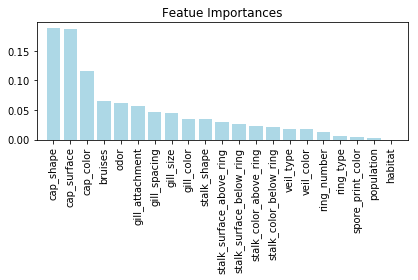

In [22]:
import matplotlib.pyplot as plt


plt.title('Featue Importances')
plt.bar(range(X_train.shape[1]), 
       importances[indices],
       color = 'lightblue',
       align = 'center')
plt.xticks(range(X_train.shape[1]),
          feat_labels, rotation=90)

plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [18]:
all_features = df[['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 
                                                      'gill_color', 'stalk_shape', 'stalk_surface_above_ring','stalk_surface_below_ring', 
                   'stalk_color_above_ring', 'stalk_color_below_ring']].values


all_classes = df['result'].values

feature_names = ['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 
                                                      'gill_color', 'stalk_shape', 'stalk_surface_above_ring','stalk_surface_below_ring', 
                   'stalk_color_above_ring', 'stalk_color_below_ring']

all_features

array([[ 3,  4,  1, ...,  4,  8,  8],
       [ 3,  4, 10, ...,  4,  8,  8],
       [ 1,  4,  9, ...,  4,  8,  8],
       ...,
       [ 4,  4,  1, ...,  4,  5,  5],
       [ 5,  3,  1, ...,  3,  8,  8],
       [ 3,  4,  1, ...,  4,  5,  5]], dtype=int64)

In [19]:
#Some of our models require the input data to be normalized


from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
all_features_scaled = scaler.fit_transform(all_features)
all_features_scaled

C:\Users\maria\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.54578187,  1.06566882, -1.25530239, ...,  0.66079607,
         0.72462211,  0.73211242],
       [-0.54578187,  1.06566882,  1.35780231, ...,  0.66079607,
         0.72462211,  0.73211242],
       [-2.764967  ,  1.06566882,  1.06745734, ...,  0.66079607,
         0.72462211,  0.73211242],
       ...,
       [ 0.5638107 ,  1.06566882, -1.25530239, ...,  0.66079607,
        -0.67478281, -0.63496112],
       [ 1.67340326,  0.21789233, -1.25530239, ..., -0.4882423 ,
         0.72462211,  0.73211242],
       [-0.54578187,  1.06566882, -1.25530239, ...,  0.66079607,
        -0.67478281, -0.63496112]])

## Decision Tree after prunning

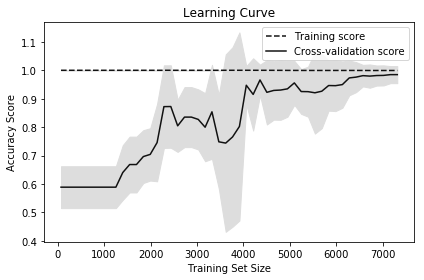

In [31]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(DecisionTreeClassifier(random_state=1, criterion = 'entropy'), 
                                                        all_features_scaled, 
                                                        all_classes,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [21]:
from sklearn.tree import DecisionTreeClassifier
import numpy
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn import cross_validation
from sklearn import tree
from datetime import datetime


startTime = datetime.now()

(X_train,
 X_test,
 y_train,
 y_test) = cross_validation.train_test_split(all_features_scaled, all_classes, train_size=0.80, random_state=0)


clf= DecisionTreeClassifier(criterion = 'entropy', random_state=0)

# Train the classifier on the training set
clf.fit(X_train, y_train)
print()
print(datetime.now() - startTime)


0:00:00.009974


In [33]:
clf.score(X_test, y_test)

0.9987692307692307

In [22]:
clf_predict_test = clf.predict(X_test)
f1= (metrics.f1_score(y_test, clf_predict_test, average='weighted'))
print(f1*100)

99.87692307692308


In [23]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)

(cv_scores.mean())*100

98.47223675689285

## Boosting

In [24]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier
startTime = datetime.now()

#ada = AdaBoostClassifier(random_state=1)
ada = AdaBoostClassifier(
                         n_estimators=500,
                         learning_rate=0.1,
                         random_state=1)

# Train the classifier on the training set
ada.fit(X_train, y_train)
#clf = clf.fit(X,y)
print((ada.score(X_test, y_test))*100)

print()
print(datetime.now() - startTime)


C:\Users\maria\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


99.93846153846154

0:00:01.884399


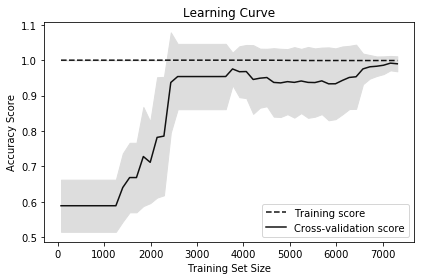

In [37]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(AdaBoostClassifier(random_state=1), 
                                                        all_features_scaled, 
                                                        all_classes,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

### F1 score for AdaBoost

In [25]:
ada_predict_test = ada.predict(X_test)
f1= (metrics.f1_score(y_test, ada_predict_test, average='weighted'))
print(f1*100)

99.93845966957147


In [26]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)

(cv_scores.mean())*100

98.47223675689285

## Neural Networks


In [47]:

all_features = df[['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 
                    'gill_color', 'stalk_shape','stalk_surface_above_ring','stalk_surface_below_ring','stalk_color_above_ring',
                   'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat']].values


all_classes = df['result'].values

feature_names = ['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 
                    'gill_color', 'stalk_shape','stalk_surface_above_ring','stalk_surface_below_ring','stalk_color_above_ring',
                   'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat']

all_features

array([[ 3,  4,  1, ...,  1,  4,  5],
       [ 3,  4, 10, ...,  2,  3,  1],
       [ 1,  4,  9, ...,  2,  3,  3],
       ...,
       [ 4,  4,  1, ...,  3,  2,  2],
       [ 5,  3,  1, ...,  8,  5,  2],
       [ 3,  4,  1, ...,  6,  2,  2]], dtype=int64)

In [48]:
#Some of our models require the input data to be normalized


from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
all_features_scaled = scaler.fit_transform(all_features)
all_features_scaled

C:\Users\maria\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.54578187,  1.06566882, -1.25530239, ..., -1.08385612,
        -0.5143892 ,  0.30781092],
       [-0.54578187,  1.06566882,  1.35780231, ..., -0.72989057,
        -1.31310821, -1.2728818 ],
       [-2.764967  ,  1.06566882,  1.06745734, ..., -0.72989057,
        -1.31310821, -0.48253544],
       ...,
       [ 0.5638107 ,  1.06566882, -1.25530239, ..., -0.37592501,
        -2.11182722, -0.87770862],
       [ 1.67340326,  0.21789233, -1.25530239, ...,  1.39390276,
         0.28432981, -0.87770862],
       [-0.54578187,  1.06566882, -1.25530239, ...,  0.68597165,
        -2.11182722, -0.87770862]])

In [49]:
(X_train,
 X_test,
 y_train,
 y_test) = cross_validation.train_test_split(all_features_scaled, all_classes, train_size=0.80, random_state=0)

In [50]:

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import cross_val_score

startTime = datetime.now()

def create_model():
    model = Sequential()
    model.add(Dense(5, input_dim=21, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
print(datetime.now() - startTime)

0:00:00


In [51]:
from keras.wrappers.scikit_learn import KerasClassifier

# Wrap our Keras model in an estimator compatible with scikit_learn
estimator = KerasClassifier(build_fn=create_model, epochs=2, verbose=0)
# Now we can use scikit_learn's cross_val_score to evaluate this model identically to the others
cv_scores = cross_val_score(estimator, all_features_scaled, all_classes, cv=10)
print(cv_scores.mean()*100)
print()
print(datetime.now() - startTime)

89.37729870056167

0:00:21.361171


In [52]:
estimator.fit(X_train, y_train)

In [53]:
estimator_predict_test = estimator.predict(X_test)
f1= (metrics.f1_score(y_test, estimator_predict_test, average='weighted'))
print(f1*100)

93.40052830253043


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


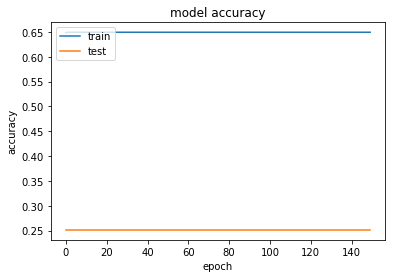

In [108]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed()
# load pima indians dataset
#dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = all_features_scaled
Y = all_classes
# create model
model = Sequential()
model.add(Dense(12, input_dim=21, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

## SVM

In [54]:
(X_train,
 X_test,
 y_train,
 y_test) = cross_validation.train_test_split(all_features_scaled, all_classes, train_size=0.80, random_state=0)

In [55]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from datetime import datetime

startTime = datetime.now()

C = 1.0
svc = svm.SVC(kernel='linear', C=C)
svc.fit(X_test, y_test)
svc.score(X_test, y_test)
print(datetime.now() - startTime)


0:00:00.127620


In [36]:
svm_predict_test = svc.predict(X_test)
f1 = (metrics.f1_score(y_test, svm_predict_test, average='weighted'))
print(f1*100)

95.19762551026302


In [37]:
cv_scores = cross_val_score(svc, all_features_scaled, all_classes, cv=10)
print(cv_scores.mean()*100)
print()
print(datetime.now() - startTime)


86.83771578214345

0:00:20.485438


# Plotting the Learning Curve for SVM with linear Kernel

C:\Users\maria\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


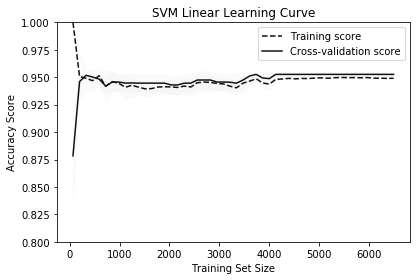

0:00:28.000622


In [117]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

from sklearn.svm import SVC
from datetime import datetime
import matplotlib.pyplot as plt

startTime = datetime.now()

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.01, 1.0, 50)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
        
    #plt.xlabel("Training examples")
    #plt.ylabel("Score")
    
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    
    
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#DDDDDD")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#DDDDDD")
    plt.plot(train_sizes, train_scores_mean, '--', color="#111111",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, color="#111111",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

X, y = all_features_scaled, all_classes

title = "SVM Linear Learning Curve"
# SVC is more expensive so we do a lower number of CV iterations:
# I have also tried with 10 splits and got the same graph so for the faster performance i have decided to go with 3 splits.
cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
estimator = SVC(kernel='linear')
plot_learning_curve(estimator, title, X, y, (0.8, 1), cv=cv, n_jobs=4)

plt.show()
print(datetime.now() - startTime)


# SVM with Sigmoid Kernel

In [56]:
startTime = datetime.now()

C = 1.0
svc = svm.SVC(kernel='sigmoid', C=C)
cv_scores = cross_val_score(svc, all_features_scaled, all_classes, cv=10)
print(cv_scores.mean()*100)
print()
print(datetime.now() - startTime)

73.86371329531205

0:00:07.837132


In [40]:
svc.fit(X_test, y_test)
svc.score(X_test, y_test)

0.8184615384615385

In [41]:
svm_sigmoid_predict_test = svc.predict(X_test)
f1=(metrics.f1_score(y_test, svm_sigmoid_predict_test, average='weighted'))
print(f1*100)

81.85049304052235


C:\Users\maria\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


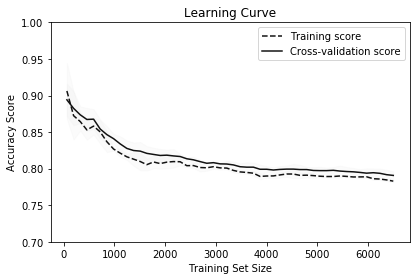

In [122]:
title = "Learning Curve"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
estimator = SVC(kernel='sigmoid')
plot_learning_curve(estimator, title, X, y, (0.7, 1), cv=cv, n_jobs=4)

plt.show()

# SVM with Poly Kernel


In [57]:
startTime = datetime.now()

C = 1.0
svc = svm.SVC(kernel='poly', C=C)
cv_scores = cross_val_score(svc, all_features_scaled, all_classes, cv=10)
print(cv_scores.mean()*100)
print()
print(datetime.now() - startTime)

97.50055737302134

0:00:01.389184


In [43]:
svc.fit(X_test, y_test)
svc.score(X_test, y_test)

1.0

In [44]:
svm_poly_predict_test = svc.predict(X_test)
f1= (metrics.f1_score(y_test, svm_poly_predict_test, average='weighted'))
print(f1*100)

100.0


C:\Users\maria\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


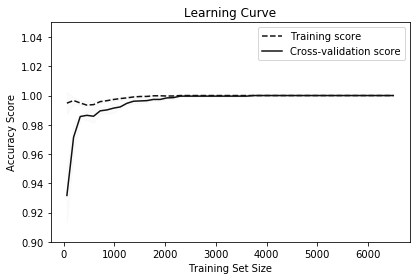

In [141]:
from sklearn.model_selection import ShuffleSplit

title = "Learning Curve"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
#estimator = SVC(kernel='poly')
estimator = svc
plot_learning_curve(estimator, title, X, y, (0.9, 1.05), cv=cv, n_jobs=4)

plt.show()

## KNN


In [45]:
from sklearn import neighbors
from sklearn.model_selection import ShuffleSplit
startTime = datetime.now()


clf = neighbors.KNeighborsClassifier(n_neighbors=5)
cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)

print(cv_scores.mean()*100)
print() 
print(datetime.now() - startTime)

96.5901056051251

0:00:01.844504


In [129]:
cv_scores_list= []
for n in range(1, 50):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)
    cv_scores_list.append(cv_scores.mean())
   # print (n, cv_scores.mean())
print (cv_scores_list)

[0.9745320720778107, 0.9742884962758384, 0.9682441460666148, 0.9676297465810663, 0.965901056051251, 0.9644265579523859, 0.9634376947961835, 0.9631922990006718, 0.9629447798793647, 0.9612230659914489, 0.9620837712692787, 0.9609770635314243, 0.9609764568669114, 0.9596234433367762, 0.9588824026341373, 0.9583919143753705, 0.9549372633060486, 0.9543240771495259, 0.9548142620760363, 0.9537078576704385, 0.9532134260923373, 0.953462461874927, 0.9522272929264434, 0.9518613225589716, 0.9496409304413636, 0.9505052757062712, 0.9492710167545573, 0.9473029970743603, 0.9475480895376155, 0.9460726814419809, 0.9438519859921163, 0.9443482375637566, 0.9442218996789228, 0.9433633177268888, 0.9416364471906125, 0.9407745285837569, 0.9392936605075052, 0.9406515273537446, 0.9384314385683931, 0.9378176457473575, 0.9337476851957176, 0.9346129404573947, 0.932885766588862, 0.9323961883268648, 0.931039231477395, 0.9310416581354468, 0.9301782228673089, 0.9294402154872351, 0.9282065632000339]


In [130]:
max_element = max(cv_scores_list)


print(max_element)

index_of_max = cv_scores_list.index((max_element))+1

print(index_of_max)

0.9745320720778107
1


C:\Users\maria\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


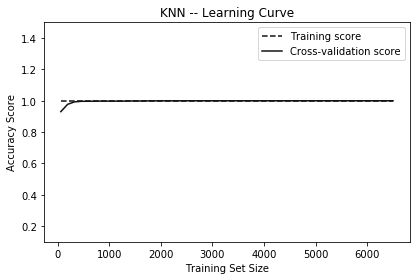

In [142]:
title = "KNN -- Learning Curve"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
estimator = neighbors.KNeighborsClassifier(n_neighbors=1) #or n_neighbors = index_of_max
plot_learning_curve(estimator, title, X, y, (0.1, 1.5), cv=cv, n_jobs=4)

plt.show()

In [133]:
clf.fit(X_test, y_test)
clf.score(X_test, y_test)

0.9581538461538461

In [46]:
clf_predict_test = svc.predict(X_test)
f1=(metrics.f1_score(y_test, clf_predict_test, average='weighted'))
print(f1*100)

100.0
